# Municipalities, Gardens, and Toxic Release Map

In [1]:
# libraries
import pandas as pd
import geopandas as gpd

import contextily as ctx
import matplotlib.pyplot as plt

In [23]:
# loading files

# municipalities list
munis = pd.read_csv('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/Municipalities List.csv')

# boundaries for CA municipalities
CAcitylines = gpd.read_file('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/CA_Places_TIGER2016.shp')

# LAcitybounds 
LACcitieslines  = gpd.read_file('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/City_Boundaries.geojson')
# LACcitieslines  = gpd.read_file('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/City_Boundaries_Lines.shp',  encoding="utf-8")

# toxic release
toxrel = pd.read_csv('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/2021_ca.csv')

# LAC urban ag sites
UALAC = pd.read_excel('C:/Users/Urna6/OneDrive/Melody/GitHub/homeworks/project-ngmelo/Cultivate LA sites as of 4-1-2017 (3).xlsx')

In [24]:
LACcitieslines.head(2)

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,ShapeSTArea,ShapeSTLength,geometry
0,366,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,1.097324e+05,5448.776853,"POLYGON ((-118.11850 33.74278, -118.11855 33.7..."
1,367,Redondo Beach,Redondo Beach,RBCH,6.349,City,Water,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,4.883225e+06,21127.481570,"POLYGON ((-118.39235 33.84190, -118.39238 33.8..."


In [32]:
# checking projection
LACcitieslines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
LACcitieslines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   OBJECTID          347 non-null    int64              
 1   CITY_NAME         347 non-null    object             
 2   CITY_LABEL        347 non-null    object             
 3   ABBR              347 non-null    object             
 4   OF_AREA_SM        347 non-null    float64            
 5   CITY_TYPE         347 non-null    object             
 6   FEAT_TYPE         347 non-null    object             
 7   COLOR_EGIS        347 non-null    object             
 8   URL               347 non-null    object             
 9   PHONE             347 non-null    object             
 10  last_edited_date  347 non-null    datetime64[ns, UTC]
 11  ShapeSTArea       347 non-null    float64            
 12  ShapeSTLength     347 non-null    float64            
 1

In [30]:
# confirming that there are 88 munis + unincorporated placesi in this geojson file
LACcitieslines['CITY_NAME'].value_counts()

Unincorporated      190
Los Angeles          33
Long Beach           21
Redondo Beach        10
Santa Clarita         4
                   ... 
La Verne              1
Irwindale             1
Norwalk               1
Agoura Hills          1
Hawaiian Gardens      1
Name: CITY_NAME, Length: 89, dtype: int64

<Axes: >

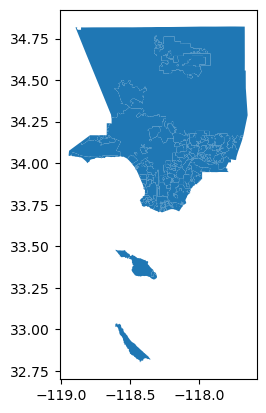

In [31]:
# plotting
LACcitieslines.plot()

### Toxic Release Data (cleaning)

In [ ]:
# inspecting
toxrel['7. COUNTY'].value_counts()

In [ ]:
# subsetting toxrelease data for counties of interest
toxrelLAC = toxrel[toxrel['7. COUNTY'] == 'LOS ANGELES']
toxrelVEN = toxrel[toxrel['7. COUNTY'] == 'VENTURA']
toxrelSON = toxrel[toxrel['7. COUNTY'] == 'SONOMA']
toxrelMEN= toxrel[toxrel['7. COUNTY'] == 'MENDOCINO']
toxrelLAK= toxrel[toxrel['7. COUNTY'] == 'LAKE']

# looking at LAC
toxrelLAC.tail(3)

In [ ]:
# subset toxrelLAC
toxrelLAC = toxrelLAC[['2. TRIFD', '4. FACILITY NAME', '5. STREET ADDRESS','6. CITY', '7. COUNTY', '10. BIA', 
                       '11. TRIBE', '12. LATITUDE',
                       '13. LONGITUDE', '14. HORIZONTAL DATUM', '19. INDUSTRY SECTOR CODE', '20. INDUSTRY SECTOR',
                       '27. PRIMARY NAICS', '43. CARCINOGEN', '47. UNIT OF MEASURE', '50. 5.3 - WATER', 
                       '51. 5.4 - UNDERGROUND', '52. 5.4.1 - UNDERGROUND CL I', 
                       '53. 5.4.2 - UNDERGROUND C II-V', '54. 5.5.1 - LANDFILLS', 
                       '55. 5.5.1A - RCRA C LANDFILL', '56. 5.5.1B - OTHER LANDFILLS', '57. 5.5.2 - LAND TREATMENT',
                       '58. 5.5.3 - SURFACE IMPNDMNT','59. 5.5.3A - RCRA SURFACE IM', '60. 5.5.3B - OTHER SURFACE I', 
                       '61. 5.5.4 - OTHER DISPOSAL', '62. ON-SITE RELEASE TOTAL', '85. OFF-SITE RELEASE TOTAL',
                       '91. OFF-SITE RECYCLED TOTAL', '101. OFF-SITE TREATED TOTAL', 
                       '116. PRODUCTION WSTE (8.1-8.7)', '117. 8.8 - ONE-TIME RELEASE']]
toxrelLAC.tail(3)

In [ ]:
# convert to gdf
# rename
toxrelLAC.rename(columns ={ '12. LATITUDE': 'LAT', '13. LONGITUDE': 'LON'}, inplace=True)

toxrelLACg = gpd.GeoDataFrame(toxrelLAC, geometry=gpd.points_from_xy(toxrelLAC.LON, toxrelLAC.LAT, 
                                          crs='EPSG:4326'))
toxrelLACg.tail(3)

In [ ]:
# toxrelLAC column for munis
"6. CITY"

### Urban Agriculture Sites in Los Angeles County (cleaning)

In [ ]:
# inspecting urban ag data
UALAC.tail(3)

In [ ]:
# convert to gdf
UALACg = gpd.GeoDataFrame(UALAC, geometry=gpd.points_from_xy(UALAC.lng, UALAC.lat, 
                                          crs='EPSG:4326'))
UALACg.tail(3)

In [ ]:
# for now, until I can geocode locations w/o coordinates, dropping locations w/o coordintes
UALACg2 = UALACg[UALACg.lng != 0.0]
print(UALACg.shape)
print(UALACg2.shape)

### MAP: Urban Agriculture Sites and Toxic Release Activities in Los Angeles County

In [ ]:
# quick plot
fig, ax = plt.subplots(figsize=(10,10))

# tox release layer
toxrelLACg.plot(ax=ax,
                column= '4. FACILITY NAME',
                marker='x',
                color='red',
                alpha=.6,
                legend=False)
# urban ag layer
UALACg2.plot(ax=ax,
                column= 'type_',
                marker='.',
                cmap='Set1',
                alpha=.4,
                legend=True)
# customs
ax.axis('off')
ax.set_title("Toxic Realease Facilities and Urban Agriculture in LA County",fontsize=16, pad=10)

# focusing on LA County sans Avalon
ax.set_ylim(33.5,35)

# basemap
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)